# Car Price Prediction

In [55]:
# importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format',lambda x:'%.3f' % x)


In [56]:
# Load the data set
df = pd.read_csv('z_Car.csv')

In [57]:
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000


In [58]:
# to drop unnamed column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Missing Values

In [59]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           221
seats            221
dtype: int64

In [60]:
# to drop the null values
df=df.dropna()
df=df.reset_index(drop='True')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


In [62]:
df.describe()

,year,selling_price,km_driven,seats
count,7906.000,7906.000,7906.000,7906.000
mean,2013.984,649813.721,69188.660,5.416
std,3.864,813582.748,56792.296,0.959
min,1994.000,29999.000,1.000,2.000
25%,2012.000,270000.000,35000.000,5.000
50%,2015.000,450000.000,60000.000,5.000
75%,2017.000,690000.000,95425.000,5.000
max,2020.000,10000000.000,2360457.000,14.000


# To deal with coloumns line wise.
1. Seats

In [63]:
df['seats'].value_counts()

5.000     6254
7.000     1120
8.000      235
4.000      133
9.000       80
6.000       62
10.000      19
2.000        2
14.000       1
Name: seats, dtype: int64

2. Torque

-->as its is non catorigical coloumn and it cannot be modified.
so will have to drop

In [64]:
df['torque'].dtype

dtype('O')

In [65]:
df=df.drop(columns='torque')

3. Max_power


In [66]:
df['max_power'].dtype

dtype('O')

In [67]:
# to remove the units
def fxn(x):
    
    return x.split(" ")[0]


df['max_power']=df['max_power'].apply(fxn)
df['max_power'].dtype

dtype('O')

In [68]:
# we cannot convert the above column into float so there are some values which have only units so to remove that coloumns.
corrupt=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-2])
    except:
        corrupt.append(i)

df=df.drop(index=corrupt)


df = df.reset_index(drop=True)

In [69]:
df['max_power']=df['max_power'].astype('float32')
df['max_power'].dtype

dtype('float32')

4. Engine

In [70]:
df['engine'].dtype

dtype('O')

In [71]:
df['engine']=df['engine'].apply(fxn)
corrupt=[]
for i in range(len(df)):
    try:
         float(df.iloc[i,-3])
    except:
         corrupt.append(i)


df = df.drop(index=corrupt)

df['engine']=df['engine'].astype('float32')

5. Mileage

In [72]:
df['mileage']=df['mileage'].apply(fxn)
corrupt=[]
for i in range(len(df)):
    try:
         float(df.iloc[i,-4])
    except:
         corrupt.append(i)


df = df.drop(index=corrupt)

df['mileage']=df['mileage'].astype('float32')

6. Owner
(catorigical column)

In [73]:
df['owner'].value_counts()

First Owner             5214
Second Owner            2015
Third Owner              510
Fifth                     86
Fourth & Above Owner      74
Test Drive Car             5
Name: owner, dtype: int64

In [74]:
df['owner']=df['owner'].replace({'Fifth':'Fourth & Above Owner'})
df['owner'].value_counts()

First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [75]:
# drop test drive car
f = df['owner']=='Test Drive Car'
df[f]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4255,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.270,1498.000,108.600,5.000
4810,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.260,1798.000,187.740,5.000
4811,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.260,1798.000,187.740,5.000
4812,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.260,1798.000,187.740,5.000
6046,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.500,1799.000,139.460,5.000


In [76]:
df=df.drop(index=df[f].index)
df=df.reset_index(drop=True)

7.  Transmission
 
 (catorigical column)


In [77]:
df['transmission'].value_counts()

Manual       6862
Automatic    1037
Name: transmission, dtype: int64

8. seller_type 


(catorigical column)
 


In [78]:
df['seller_type'].value_counts()

Individual          6561
Dealer              1102
Trustmark Dealer     236
Name: seller_type, dtype: int64

Plotting 
(violionplot)--->between seller type and selling price

Text(0.5, 1.0, 'Individual')

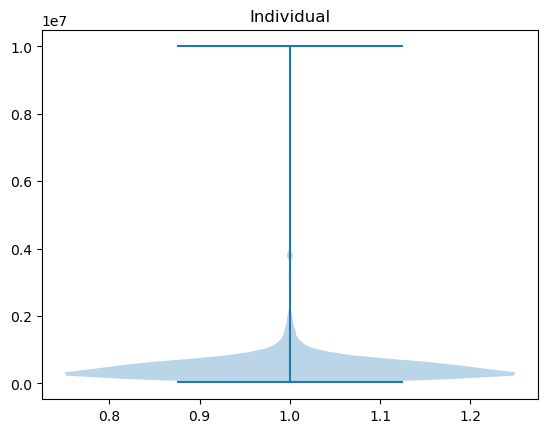

In [79]:
# filtering
f=df['seller_type']=='Individual'
data = df.loc[f,'selling_price']
plt.violinplot(data)
plt.title('Individual')


Text(0.5, 1.0, 'Dealer')

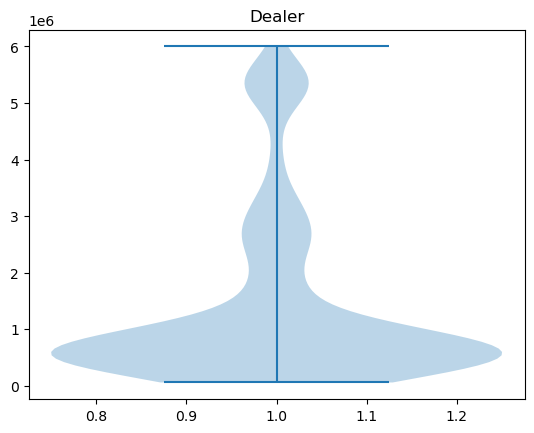

In [80]:
f=df['seller_type']=='Dealer'
data = df.loc[f,'selling_price']
plt.violinplot(data)
plt.title('Dealer')

Text(0.5, 1.0, 'Trustmark Dealer')

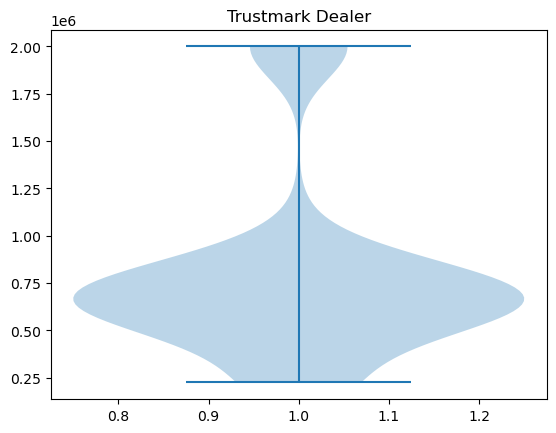

In [81]:
f=df['seller_type']=='Trustmark Dealer'
data = df.loc[f,'selling_price']
plt.violinplot(data)
plt.title('Trustmark Dealer')

all the disribution of the seller type are different. so they are non oridinal .

8. Fuel

In [82]:
df['fuel'].value_counts()

Diesel    4298
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64

Plotting 
(violionplot)--->between fuel and selling price

Text(0.5, 1.0, 'Diesel')

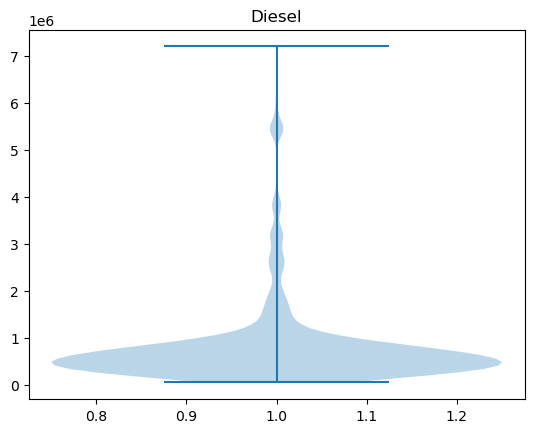

In [83]:
f=df['fuel']=='Diesel'
data = df.loc[f,'selling_price']
plt.violinplot(data)
plt.title('Diesel')


Text(0.5, 1.0, 'Petrol')

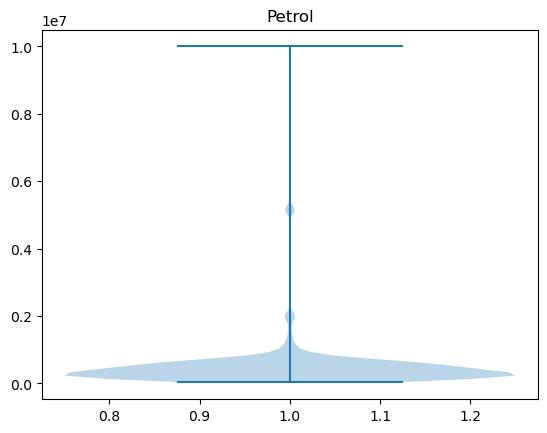

In [84]:
f=df['fuel']=='Petrol'
data = df.loc[f,'selling_price']
plt.violinplot(data)
plt.title('Petrol')

Text(0.5, 1.0, 'CNG')

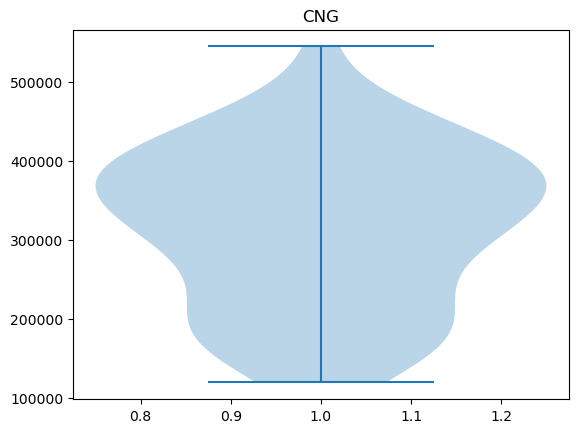

In [85]:
f=df['fuel']=='CNG'
data = df.loc[f,'selling_price']
plt.violinplot(data)
plt.title('CNG')

Text(0.5, 1.0, 'LPG')

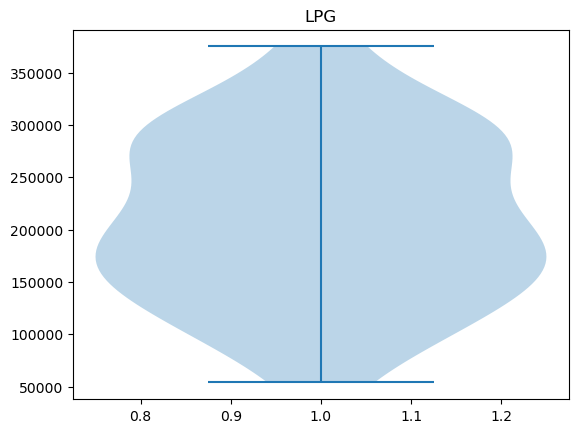

In [86]:
f=df['fuel']=='LPG'
data = df.loc[f,'selling_price']
plt.violinplot(data)
plt.title('LPG')

from the above graphs we have seen that  the disribution of petrol,diesel and cng,lpg are similar we can merge them 

In [87]:
df['fuel']=df['fuel'].replace({'Petrol':0,'Diesel':0,'LPG':1,'CNG':1})

9. km driven

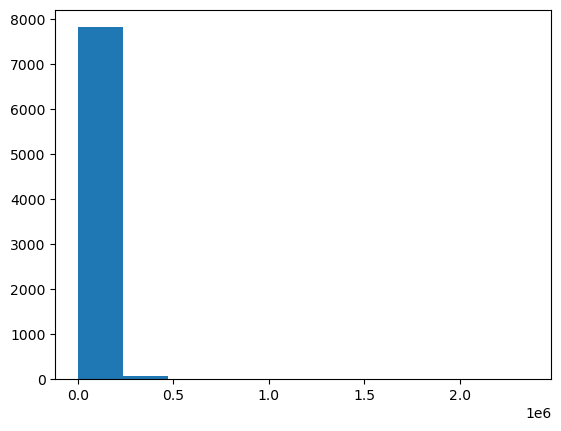

In [88]:
plt.hist(df['km_driven'])
plt.show()

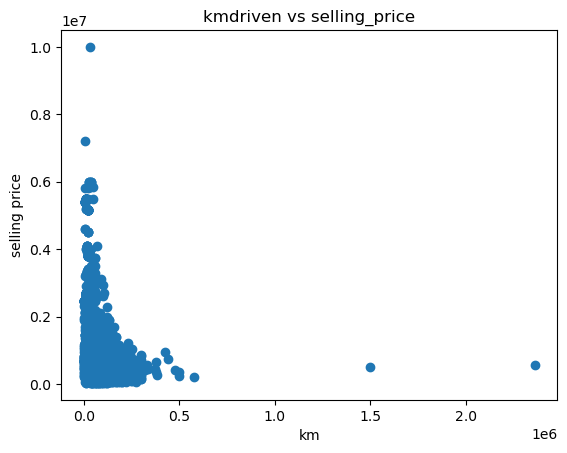

In [89]:
plt.scatter(df['km_driven'],df['selling_price'])
plt.title('kmdriven vs selling_price')
plt.xlabel('km')
plt.ylabel('selling price')
plt.show()

km driven has outliers. so we will remove them.(afterwards)

10. Name

In [90]:
# we will take only brand name.
def convert(x):
    temp=x.split()
    return temp[0]


df['name']=df['name'].apply(convert)

In [91]:
df['name'].value_counts()

Maruti           2366
Hyundai          1359
Mahindra          758
Tata              719
Honda             465
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        184
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               37
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: name, dtype: int64

In [92]:
df['name'].nunique()

31

so here i  will calculate the average selling price of brand.

In [93]:
avg_of_brand=df.groupby('name')['selling_price'].mean()
avg_of_brand=avg_of_brand.sort_values(ascending=False)

In [94]:
def changer(x):
    if x in avg_of_brand[:10]:
       return 0
    elif x in avg_of_brand[10:20]:
      return 1
    else:
       return 2
df['name']=df['name'].apply(changer)

In [95]:
# to seperate numeric and categorical columns
numeric=df[['max_power','engine','mileage','km_driven','selling_price','year']]
categorical = df[['name','fuel','seller_type','transmission','owner','seats']]

In [96]:
numeric.corr()

,max_power,engine,mileage,km_driven,selling_price,year
max_power,1.000,0.704,-0.374,-0.037,0.750,0.225
engine,0.704,1.000,-0.576,0.207,0.458,0.018
mileage,-0.374,-0.576,1.000,-0.174,-0.125,0.329
km_driven,-0.037,0.207,-0.174,1.000,-0.222,-0.429
selling_price,0.750,0.458,-0.125,-0.222,1.000,0.412
year,0.225,0.018,0.329,-0.429,0.412,1.000


<Axes: >

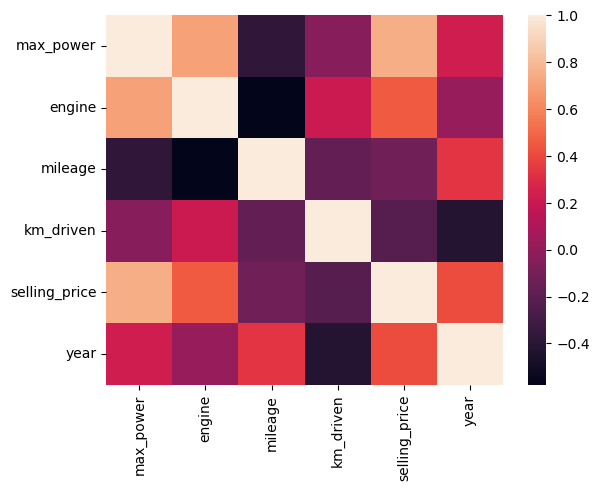

In [97]:
sns.heatmap(numeric.corr())

# encoding for categorical column.

In [98]:
le= LabelEncoder()
categorical['owner']=le.fit_transform(categorical['owner'])


In [99]:
categorical['transmission']=le.fit_transform(categorical['transmission'])

In [100]:
ct=ColumnTransformer(transformers=[("encode",OneHotEncoder(drop="first",sparse=False),[2])],remainder="passthrough")
categorical=ct.fit_transform(categorical)

# anova test

In [101]:
from sklearn.feature_selection import SelectKBest,f_classif

kbest = SelectKBest(f_classif,k=categorical.shape[1])
kbest.fit_transform(categorical,numeric['selling_price'])
print("f values",kbest.scores_)

f values [ 6.988322    6.69782293  8.20570901  1.66252386 12.03276301  3.40499271
  2.66180735]


# outlier detection

In [102]:
def zscore(x):
   mean=np.mean(x)
   std=np.std(x)
   z=(x-mean)/std
   z=z.abs()
   return x[z>3]

In [103]:
outliers1=zscore(numeric['mileage'])
outliers2=zscore(numeric['km_driven'])
outliers3=zscore(numeric['max_power'])

In [105]:
# scaling (required for db scan method)
minmax=MinMaxScaler()
data=minmax.fit_transform(numeric[['engine','selling_price']])


In [106]:
# to find k nearest neighbors
neigh=NearestNeighbors(n_neighbors=2)
n=neigh.fit(data)

distance,index=n.kneighbors(data)


In [107]:
distance=distance[:,-1]
distance.sort()

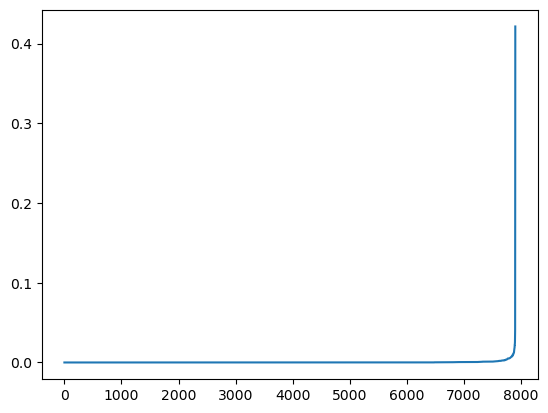

In [108]:
plt.plot(distance)

# dbscan 

to detect outliers.

In [109]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.04,min_samples=2)
model.fit(data)

DBSCAN(eps=0.04, min_samples=2)

In [114]:
# if label=-1 then it is outlier.
labels=model.labels_

In [117]:
# identify the outliers
outliers=pd.DataFrame(data[labels==-1])
outliers4=outliers[0]
outliers5=outliers[1]

In [118]:
#dropping the outliers 
numeric=numeric[~numeric['mileage'].isin(outliers1)]
numeric=numeric[~numeric['km_driven'].isin(outliers2)]
numeric=numeric[~numeric['max_power'].isin(outliers3)]
numeric=numeric[~numeric['engine'].isin(outliers4)]
numeric=numeric[~numeric['selling_price'].isin(outliers5)]


# dropping the outliers rows in categorical columns

In [119]:
categorical=pd.DataFrame(data=categorical,columns=(['seller_type','fuel','name','seller_type1','transmission','owner','seats']))
categorical

,seller_type,fuel,name,seller_type1,transmission,owner,seats
0,1.000,0.000,2.000,0.000,1.000,0.000,5.000
1,1.000,0.000,1.000,0.000,1.000,2.000,5.000
2,1.000,0.000,1.000,0.000,1.000,3.000,5.000
3,1.000,0.000,1.000,0.000,1.000,0.000,5.000
4,1.000,0.000,2.000,0.000,1.000,0.000,5.000
...,...,...,...,...,...,...,...
7894,1.000,0.000,1.000,0.000,1.000,0.000,5.000
7895,1.000,0.000,1.000,0.000,1.000,1.000,5.000
7896,1.000,0.000,2.000,0.000,1.000,0.000,5.000
7897,1.000,0.000,2.000,0.000,1.000,0.000,5.000


In [120]:
categorical=categorical[categorical.index.isin(numeric.index)]


In [121]:
categorical

,seller_type,fuel,name,seller_type1,transmission,owner,seats
0,1.000,0.000,2.000,0.000,1.000,0.000,5.000
1,1.000,0.000,1.000,0.000,1.000,2.000,5.000
2,1.000,0.000,1.000,0.000,1.000,3.000,5.000
3,1.000,0.000,1.000,0.000,1.000,0.000,5.000
4,1.000,0.000,2.000,0.000,1.000,0.000,5.000
...,...,...,...,...,...,...,...
7894,1.000,0.000,1.000,0.000,1.000,0.000,5.000
7895,1.000,0.000,1.000,0.000,1.000,1.000,5.000
7896,1.000,0.000,2.000,0.000,1.000,0.000,5.000
7897,1.000,0.000,2.000,0.000,1.000,0.000,5.000


In [122]:
data=pd.concat([categorical,numeric],axis=1,join="inner")

In [123]:
data

,seller_type,fuel,name,seller_type1,transmission,owner,seats,max_power,engine,mileage,km_driven,selling_price,year
0,1.000,0.000,2.000,0.000,1.000,0.000,5.000,74.000,1248.000,23.400,145500,450000,2014
1,1.000,0.000,1.000,0.000,1.000,2.000,5.000,103.520,1498.000,21.140,120000,370000,2014
2,1.000,0.000,1.000,0.000,1.000,3.000,5.000,78.000,1497.000,17.700,140000,158000,2006
3,1.000,0.000,1.000,0.000,1.000,0.000,5.000,90.000,1396.000,23.000,127000,225000,2010
4,1.000,0.000,2.000,0.000,1.000,0.000,5.000,88.200,1298.000,16.100,120000,130000,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,1.000,0.000,1.000,0.000,1.000,0.000,5.000,82.850,1197.000,18.500,110000,320000,2013
7895,1.000,0.000,1.000,0.000,1.000,1.000,5.000,110.000,1493.000,16.800,119000,135000,2007
7896,1.000,0.000,2.000,0.000,1.000,0.000,5.000,73.900,1248.000,19.300,120000,382000,2009
7897,1.000,0.000,2.000,0.000,1.000,0.000,5.000,70.000,1396.000,23.570,25000,290000,2013


In [124]:
x=data[['seller_type', 'fuel', 'name', 'seller_type1', 'transmission', 'owner',
       'seats','max_power','engine','mileage','km_driven','year']]
y=data['selling_price']



In [125]:
#scaling of data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stand_scale = sc.fit_transform(x)
x=pd.DataFrame(stand_scale,columns=x.columns)
x

,seller_type,fuel,name,seller_type1,transmission,owner,seats,max_power,engine,mileage,km_driven,year
0,0.447,-0.178,0.974,-0.102,0.373,-0.691,-0.433,-0.492,-0.395,1.002,1.836,0.001
1,0.447,-0.178,-0.760,-0.102,0.373,1.221,-0.433,0.424,0.127,0.417,1.239,0.001
2,0.447,-0.178,-0.760,-0.102,0.373,2.176,-0.433,-0.368,0.124,-0.472,1.707,-2.079
3,0.447,-0.178,-0.760,-0.102,0.373,-0.691,-0.433,0.005,-0.086,0.898,1.403,-1.039
4,0.447,-0.178,0.974,-0.102,0.373,-0.691,-0.433,-0.051,-0.290,-0.886,1.239,-1.819
...,...,...,...,...,...,...,...,...,...,...,...,...
7711,0.447,-0.178,-0.760,-0.102,0.373,-0.691,-0.433,-0.217,-0.501,-0.265,1.005,-0.259
7712,0.447,-0.178,-0.760,-0.102,0.373,0.265,-0.433,0.625,0.116,-0.705,1.215,-1.819
7713,0.447,-0.178,0.974,-0.102,0.373,-0.691,-0.433,-0.495,-0.395,-0.058,1.239,-1.299
7714,0.447,-0.178,0.974,-0.102,0.373,-0.691,-0.433,-0.616,-0.086,1.046,-0.985,-0.259


# Splitting the data

In [126]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Linear regresiion model

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score


lr = LinearRegression()

lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.6619201947087803

In [134]:
#or
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)



0.6619201947087803

In [136]:
'''SVM'''
from sklearn.svm import SVR
regressor = SVR(C=5000,kernel="poly")
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)
print(r2_score(y_test,y_pred))

0.8686901762423129


In [137]:
'''Decision Tree'''
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_split=25)
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)
print(r2_score(y_test,y_pred))

0.9636236531405247
